## Supernova Distance Fit

### WIP - Unfinished!!

In [132]:
from astroML.datasets import generate_mu_z
import matplotlib.pyplot as plt
import numpy as np
from astroML.linear_model import LinearRegression
from astroML.linear_model import PolynomialRegression
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import (train_test_split, KFold)
from sklearn.metrics import mean_squared_error

#Figures options!
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 500
plt.rcParams['font.size'] = 12

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


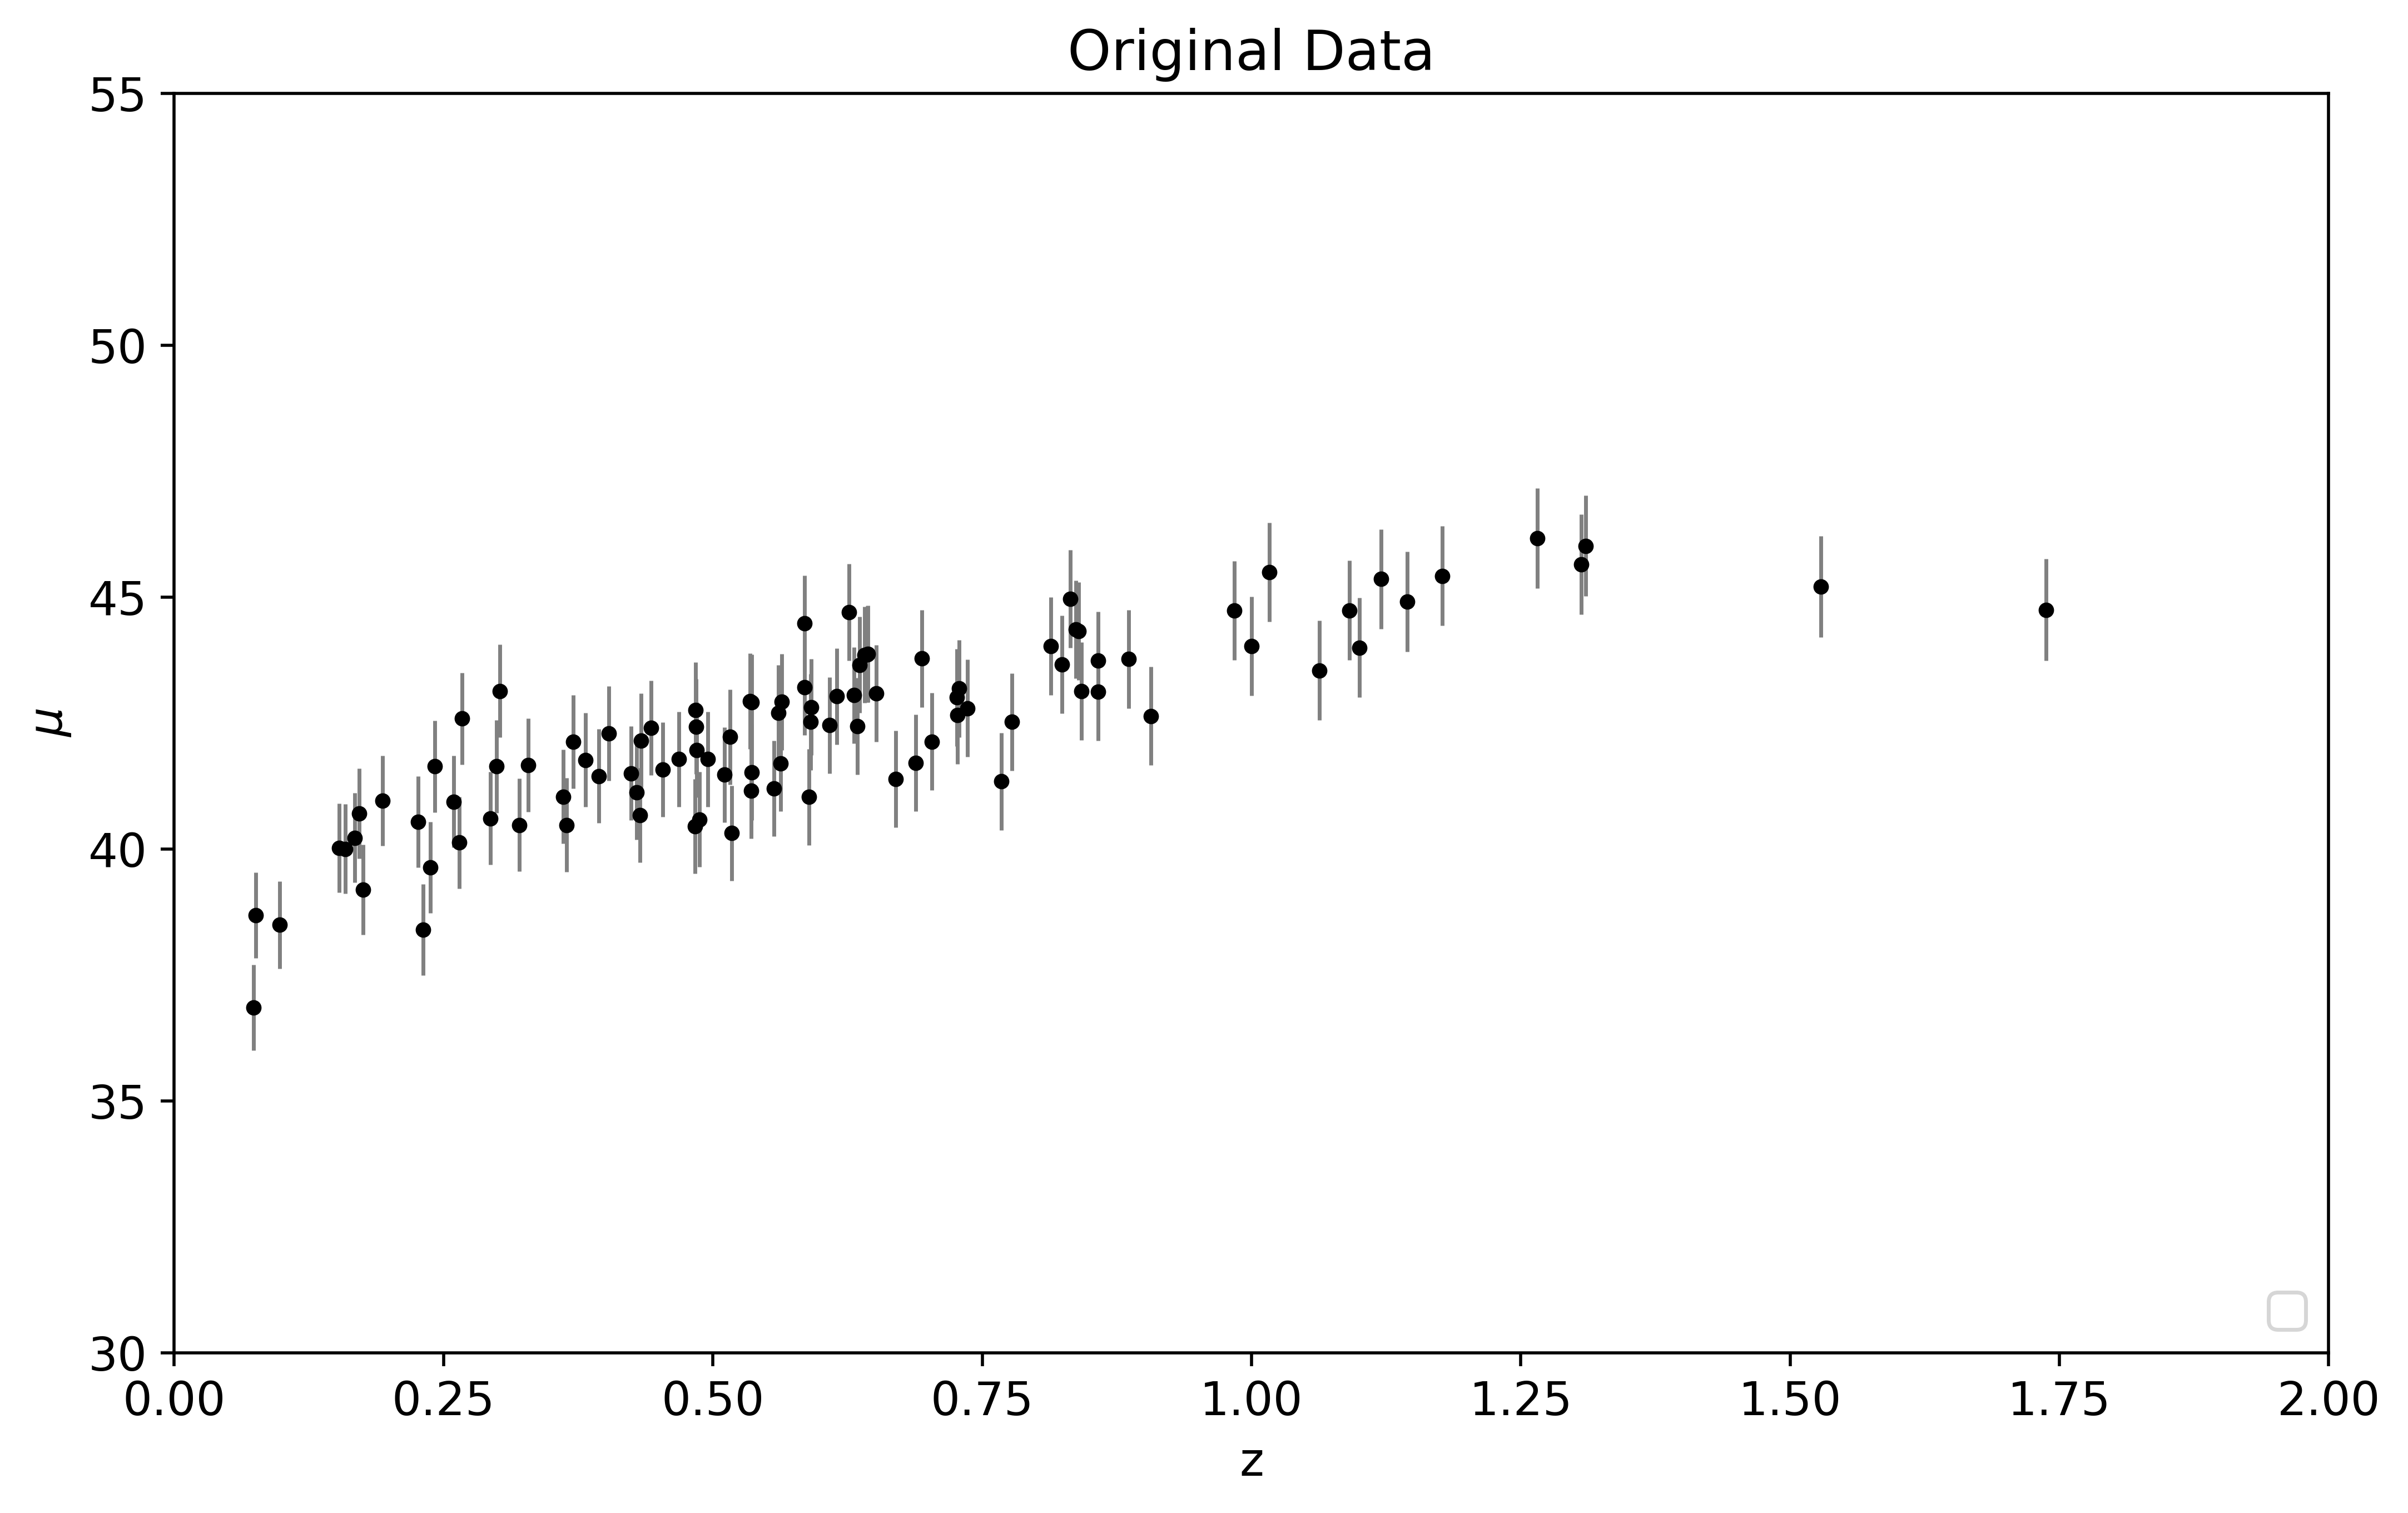

In [193]:
z_sample, mu_sample, dmu = generate_mu_z(100, random_state=1234)

plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1)
plt.title('Original Data')
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.xlim(0,2)
plt.ylim(30,55)
plt.legend(loc='lower right')
plt.show()

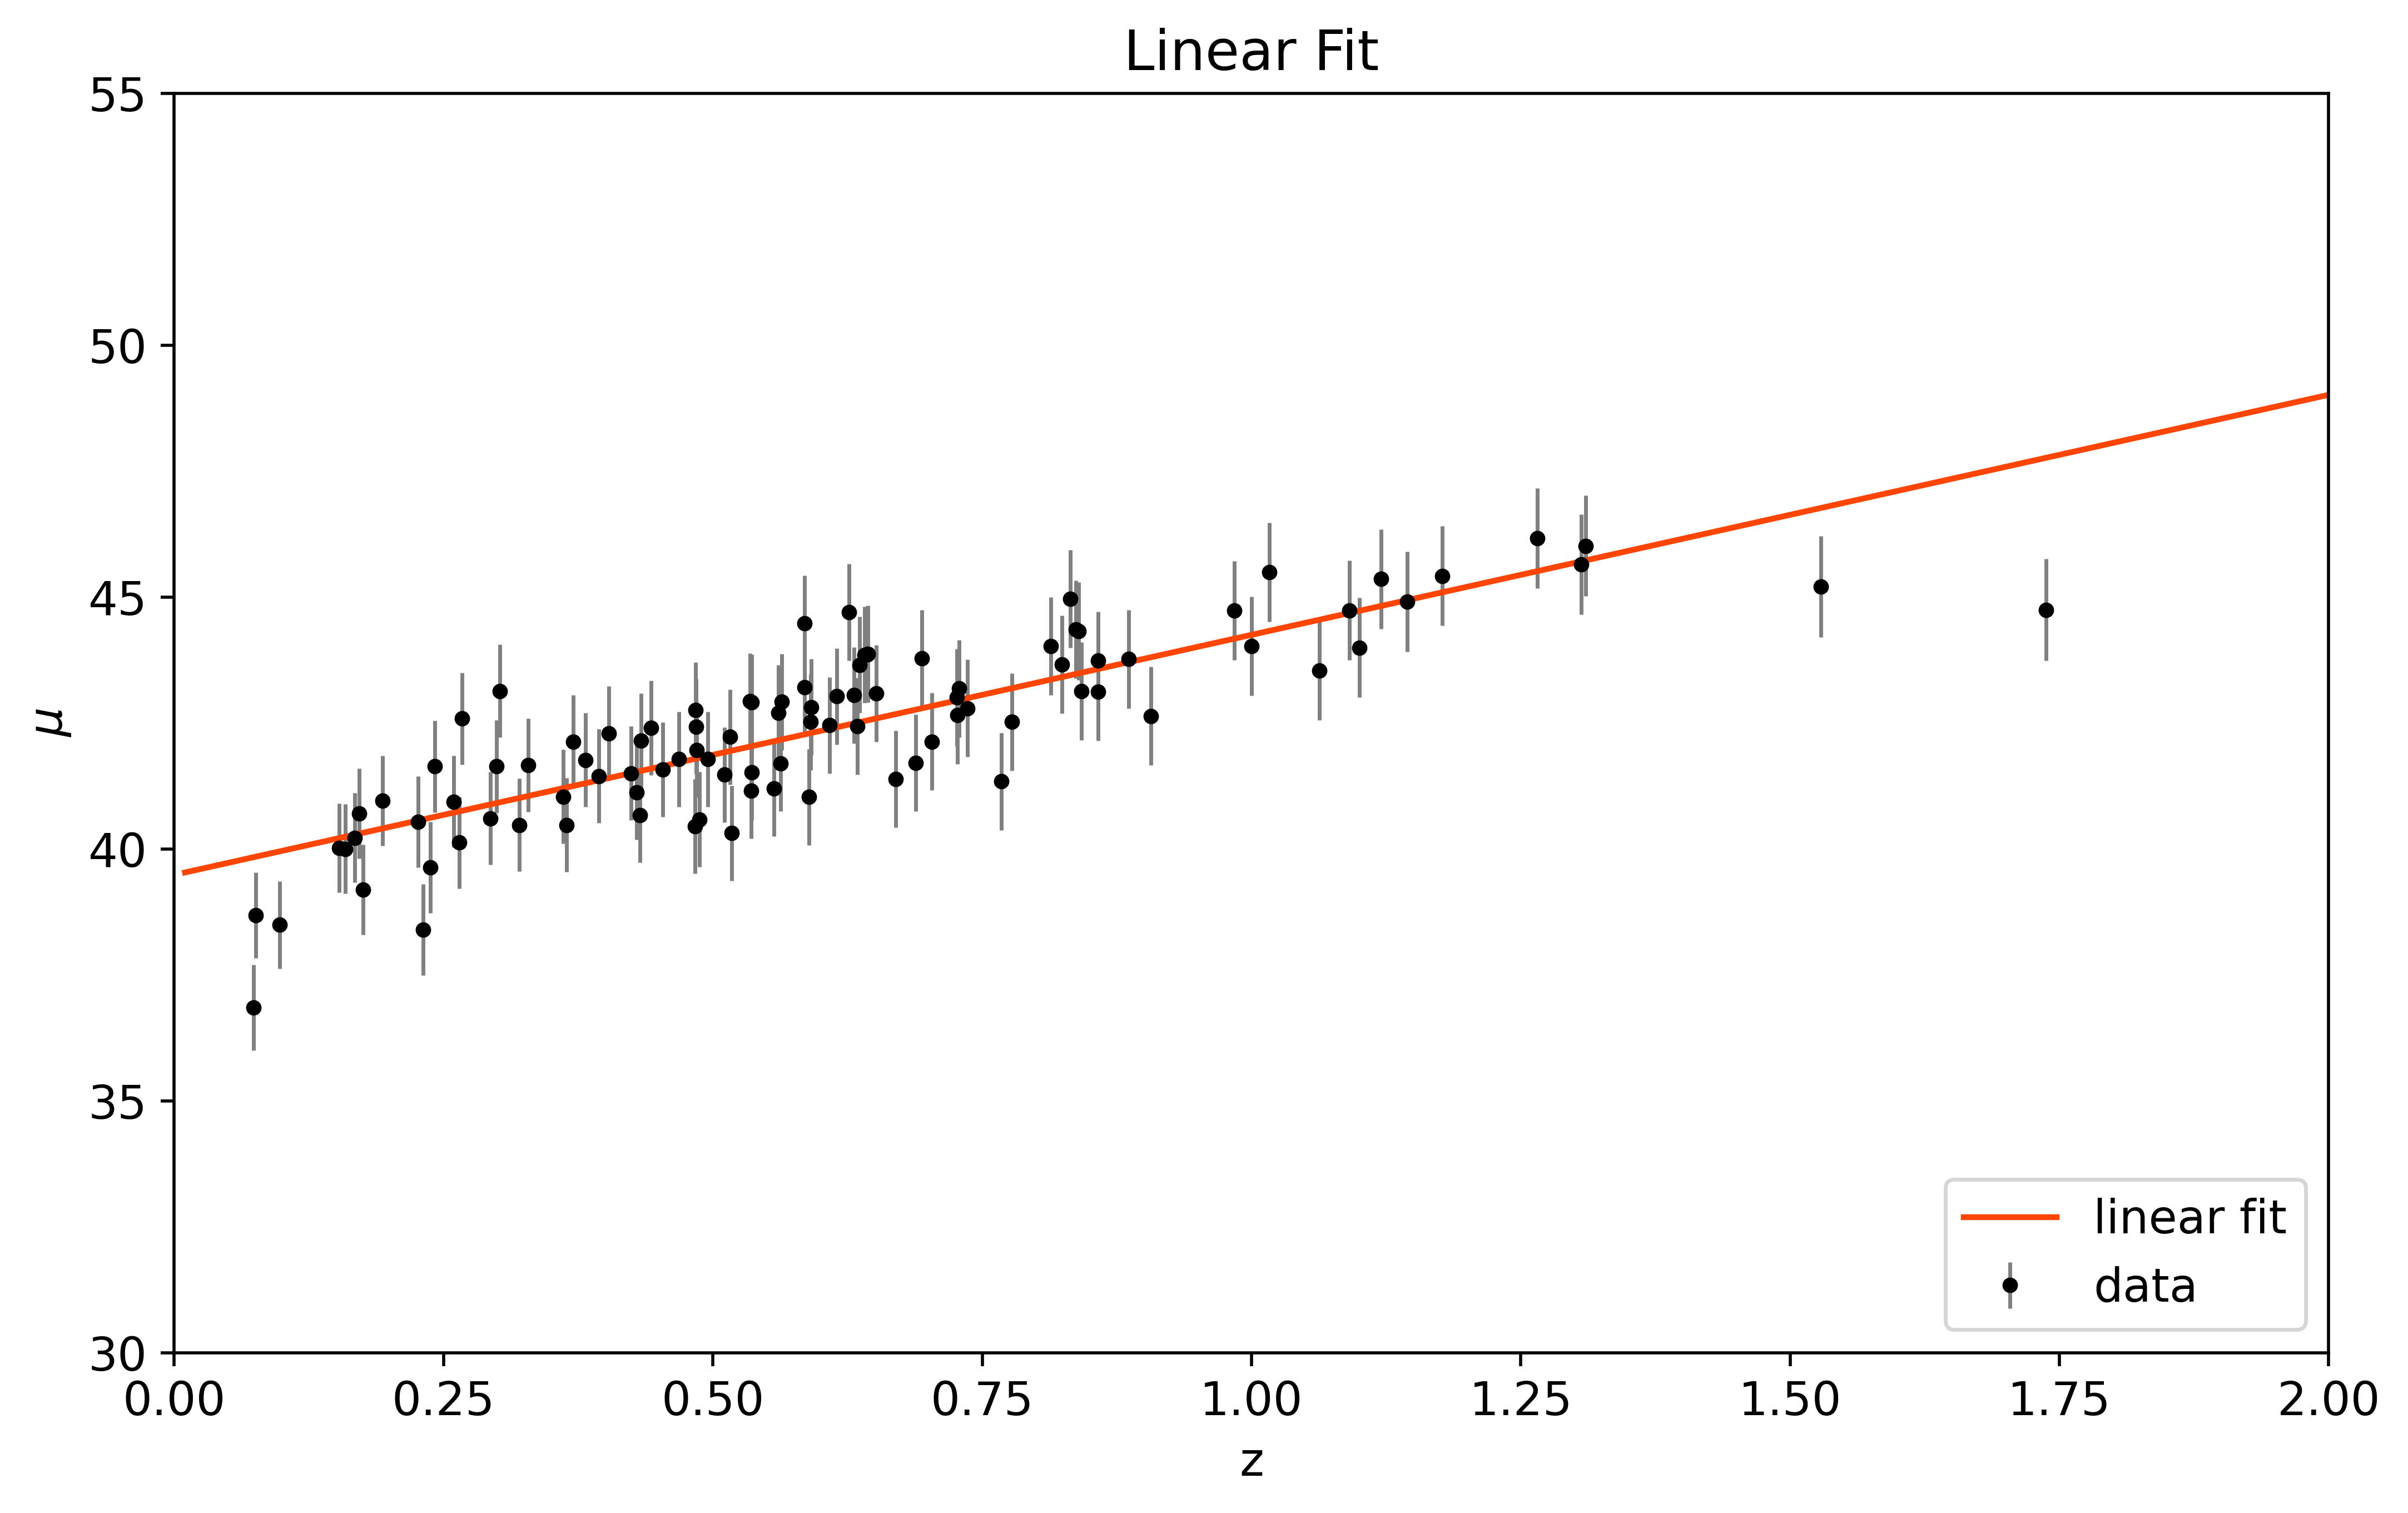

In [195]:
zgrid = np.linspace(0.01, 2, 1000)

model_linear = LinearRegression()
model_linear.fit(z_sample[:,None], mu_sample, dmu)
mu_fitted = model_linear.predict(zgrid[:, None])

plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='Data')
plt.plot(zgrid, mu_fitted, lw=1.5, c='orangered', label='Linear Fit')
plt.title('Linear Fit')
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.xlim(0,2)
plt.ylim(30,55)
plt.legend(loc='lower right')
plt.show()

Polynomial coefficients:
 [   33.07559304    87.7120308   -415.17424944  1058.97570095
 -1489.07605606  1161.10280615  -468.28719026    75.87210529]


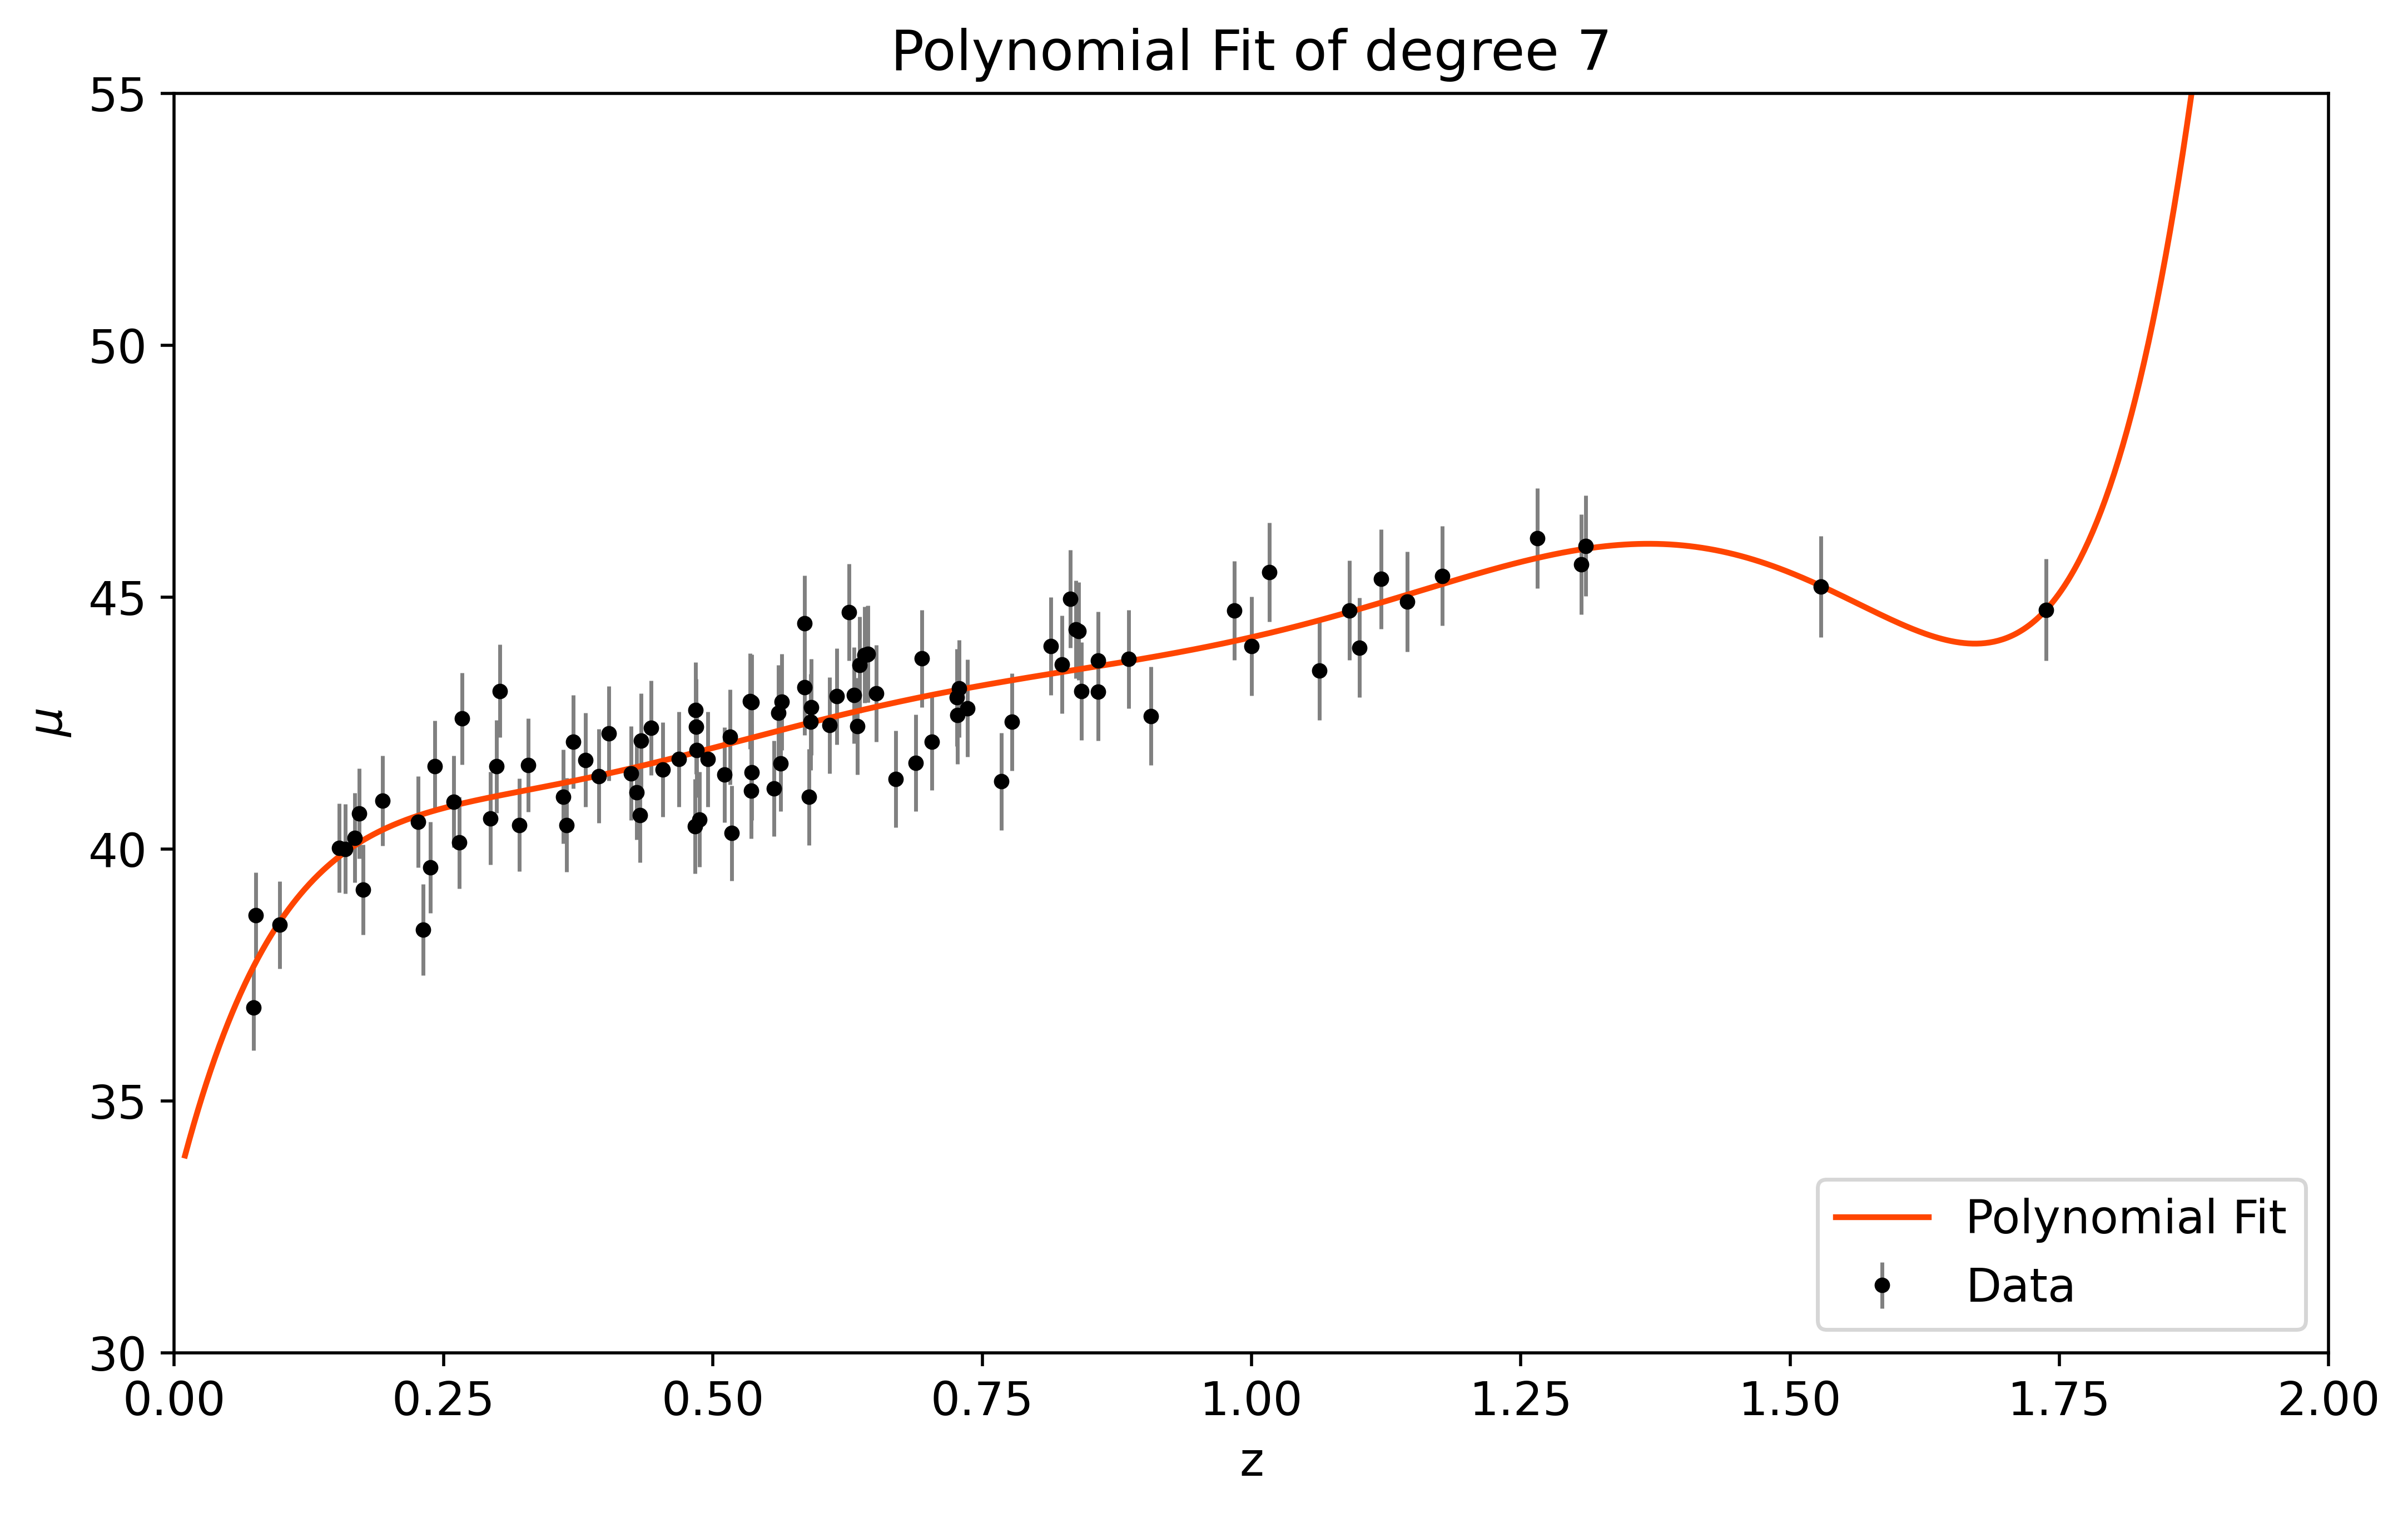

In [203]:
#Polynomial Regression
degree = 7
model_poly = PolynomialRegression(degree)
model_poly.fit(z_sample[:, None], mu_sample, dmu)

mu_fitted = model_poly.predict(zgrid[:, None])
print('Polynomial coefficients:\n', model_poly.coef_)

#Plotting
plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='Data')
plt.plot(zgrid, mu_fitted, lw=1.5, c='orangered', label='Polynomial Fit')
plt.title('Polynomial Fit of degree {}'.format(degree))
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.xlim(0,2)
plt.ylim(30,55)
plt.legend(loc='lower right')
plt.show()

MSE for polynomial model of degree 2: 0.8587
MSE for polynomial model of degree 3: 0.8934
MSE for polynomial model of degree 4: 0.9022
MSE for polynomial model of degree 5: 0.8846
MSE for polynomial model of degree 6: 1.3724
MSE for polynomial model of degree 7: 1.3076
MSE for polynomial model of degree 8: 2.0440
MSE for polynomial model of degree 9: 25.6075


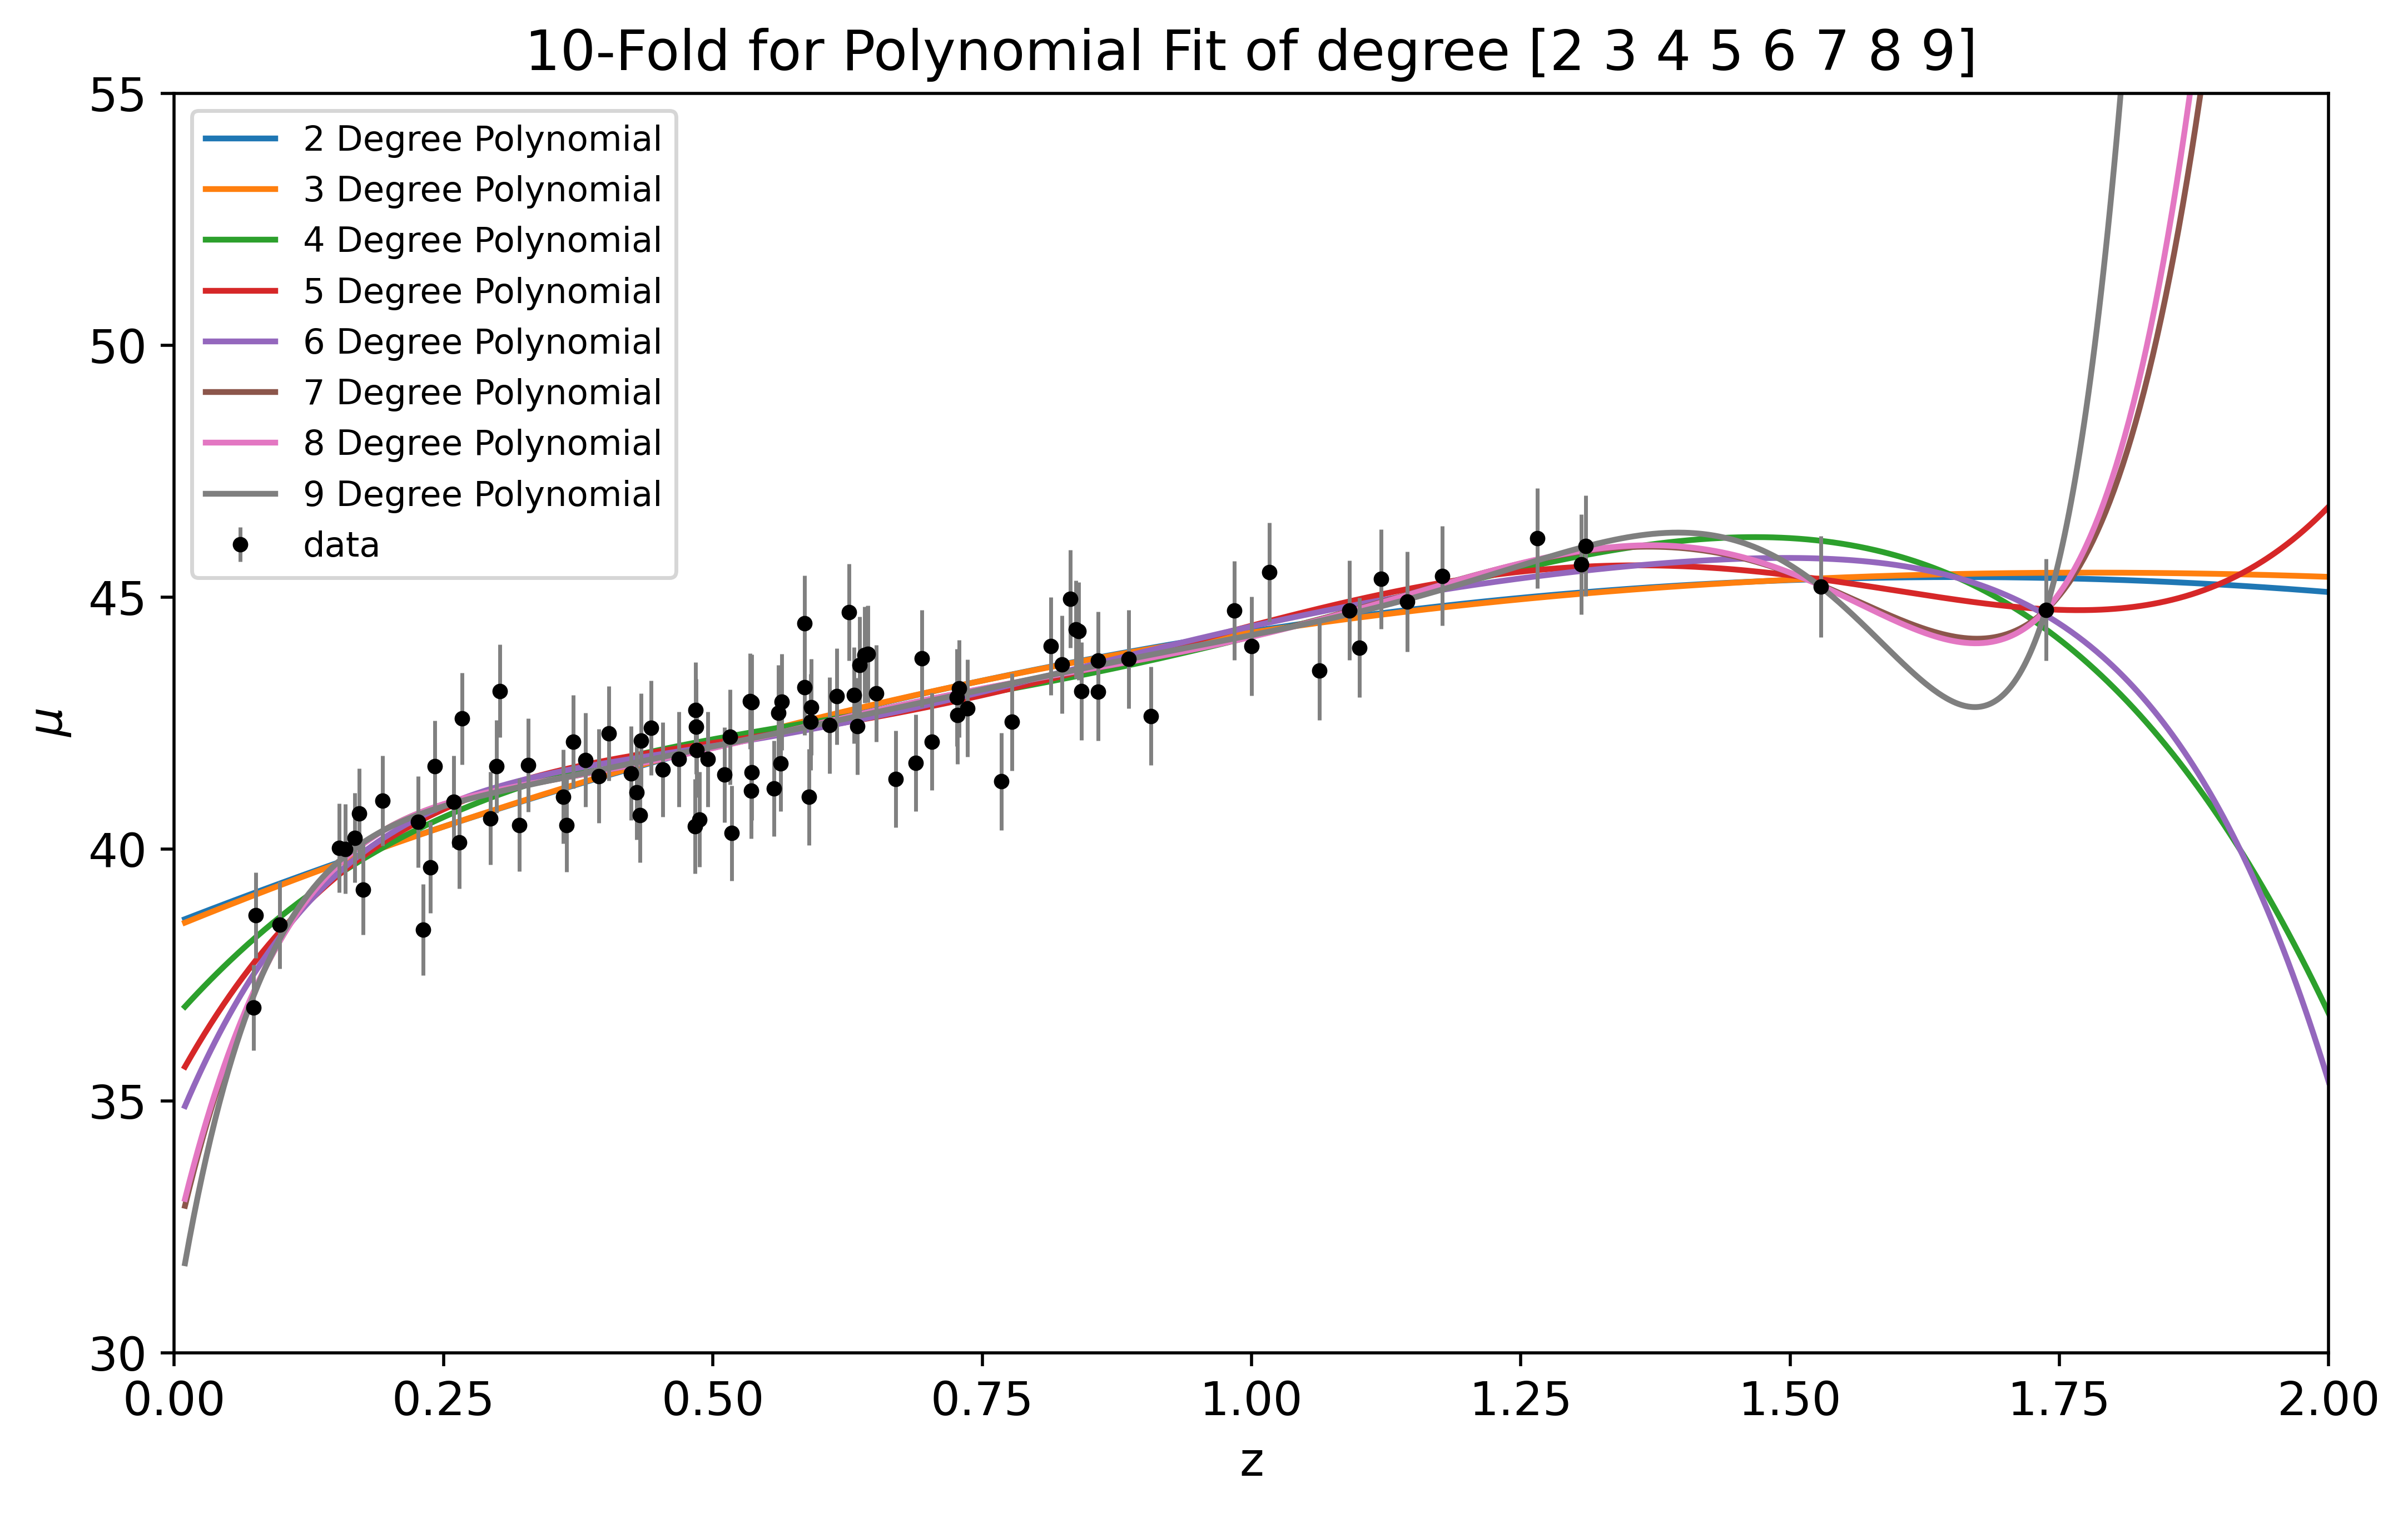

In [207]:
#K-Fold + Polynomial!!
n_splits = 10   #10 splits -> 10-Fold
fold = KFold(n_splits=n_splits, random_state=1234, shuffle=True)
fold.get_n_splits(z_sample)

#Aranging from 2 to (10-1) degrees for possible fits
degrees = np.arange(2, 10)
fold_MSE = []
fit_MSE= []

for i in degrees:
    #Initializing Model
    model = PolynomialRegression(i)

    #K-Fold
    for j, (train_index, test_index) in enumerate(fold.split(z_sample)):
        #Masking indexes on train and test subsets for each fold
        ztrain, ztest = z_sample[train_index], z_sample[test_index]
        mutrain, mutest = mu_sample[train_index], mu_sample[test_index]
        errtrain, errtest = dmu[train_index], dmu[test_index]
        
        #Fitting model
        model.fit(ztrain[:, None], mutrain, errtrain)
        
        #Evaluating Mean Square Error
        y_fitted = model.predict(ztest[:, None])
        fold_MSE.append(mean_squared_error(mutest, y_fitted))
    
    #Saving mean of MSE for each fold
    fit_MSE.append(np.mean(fold_MSE))
    print('MSE for polynomial model of degree {}: {:.4f}'.format(i, np.mean(fit_MSE)))
    fold_MSE.clear()

    #Predicting on the whole set
    mu_fit = model.predict(zgrid[:, None])

    #Plotting
    plt.plot(zgrid, mu_fit, lw=1.5, label=str(i) + ' Degree Polynomial')

fit_MSE = np.array(fit_MSE)

plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.title('{}-Fold for Polynomial Fit of degree {}'.format(n_splits, degrees))
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.xlim(0,2)
plt.ylim(30,55)
plt.legend(loc='best', fontsize=9)
plt.show()

Best fit for degree:  5


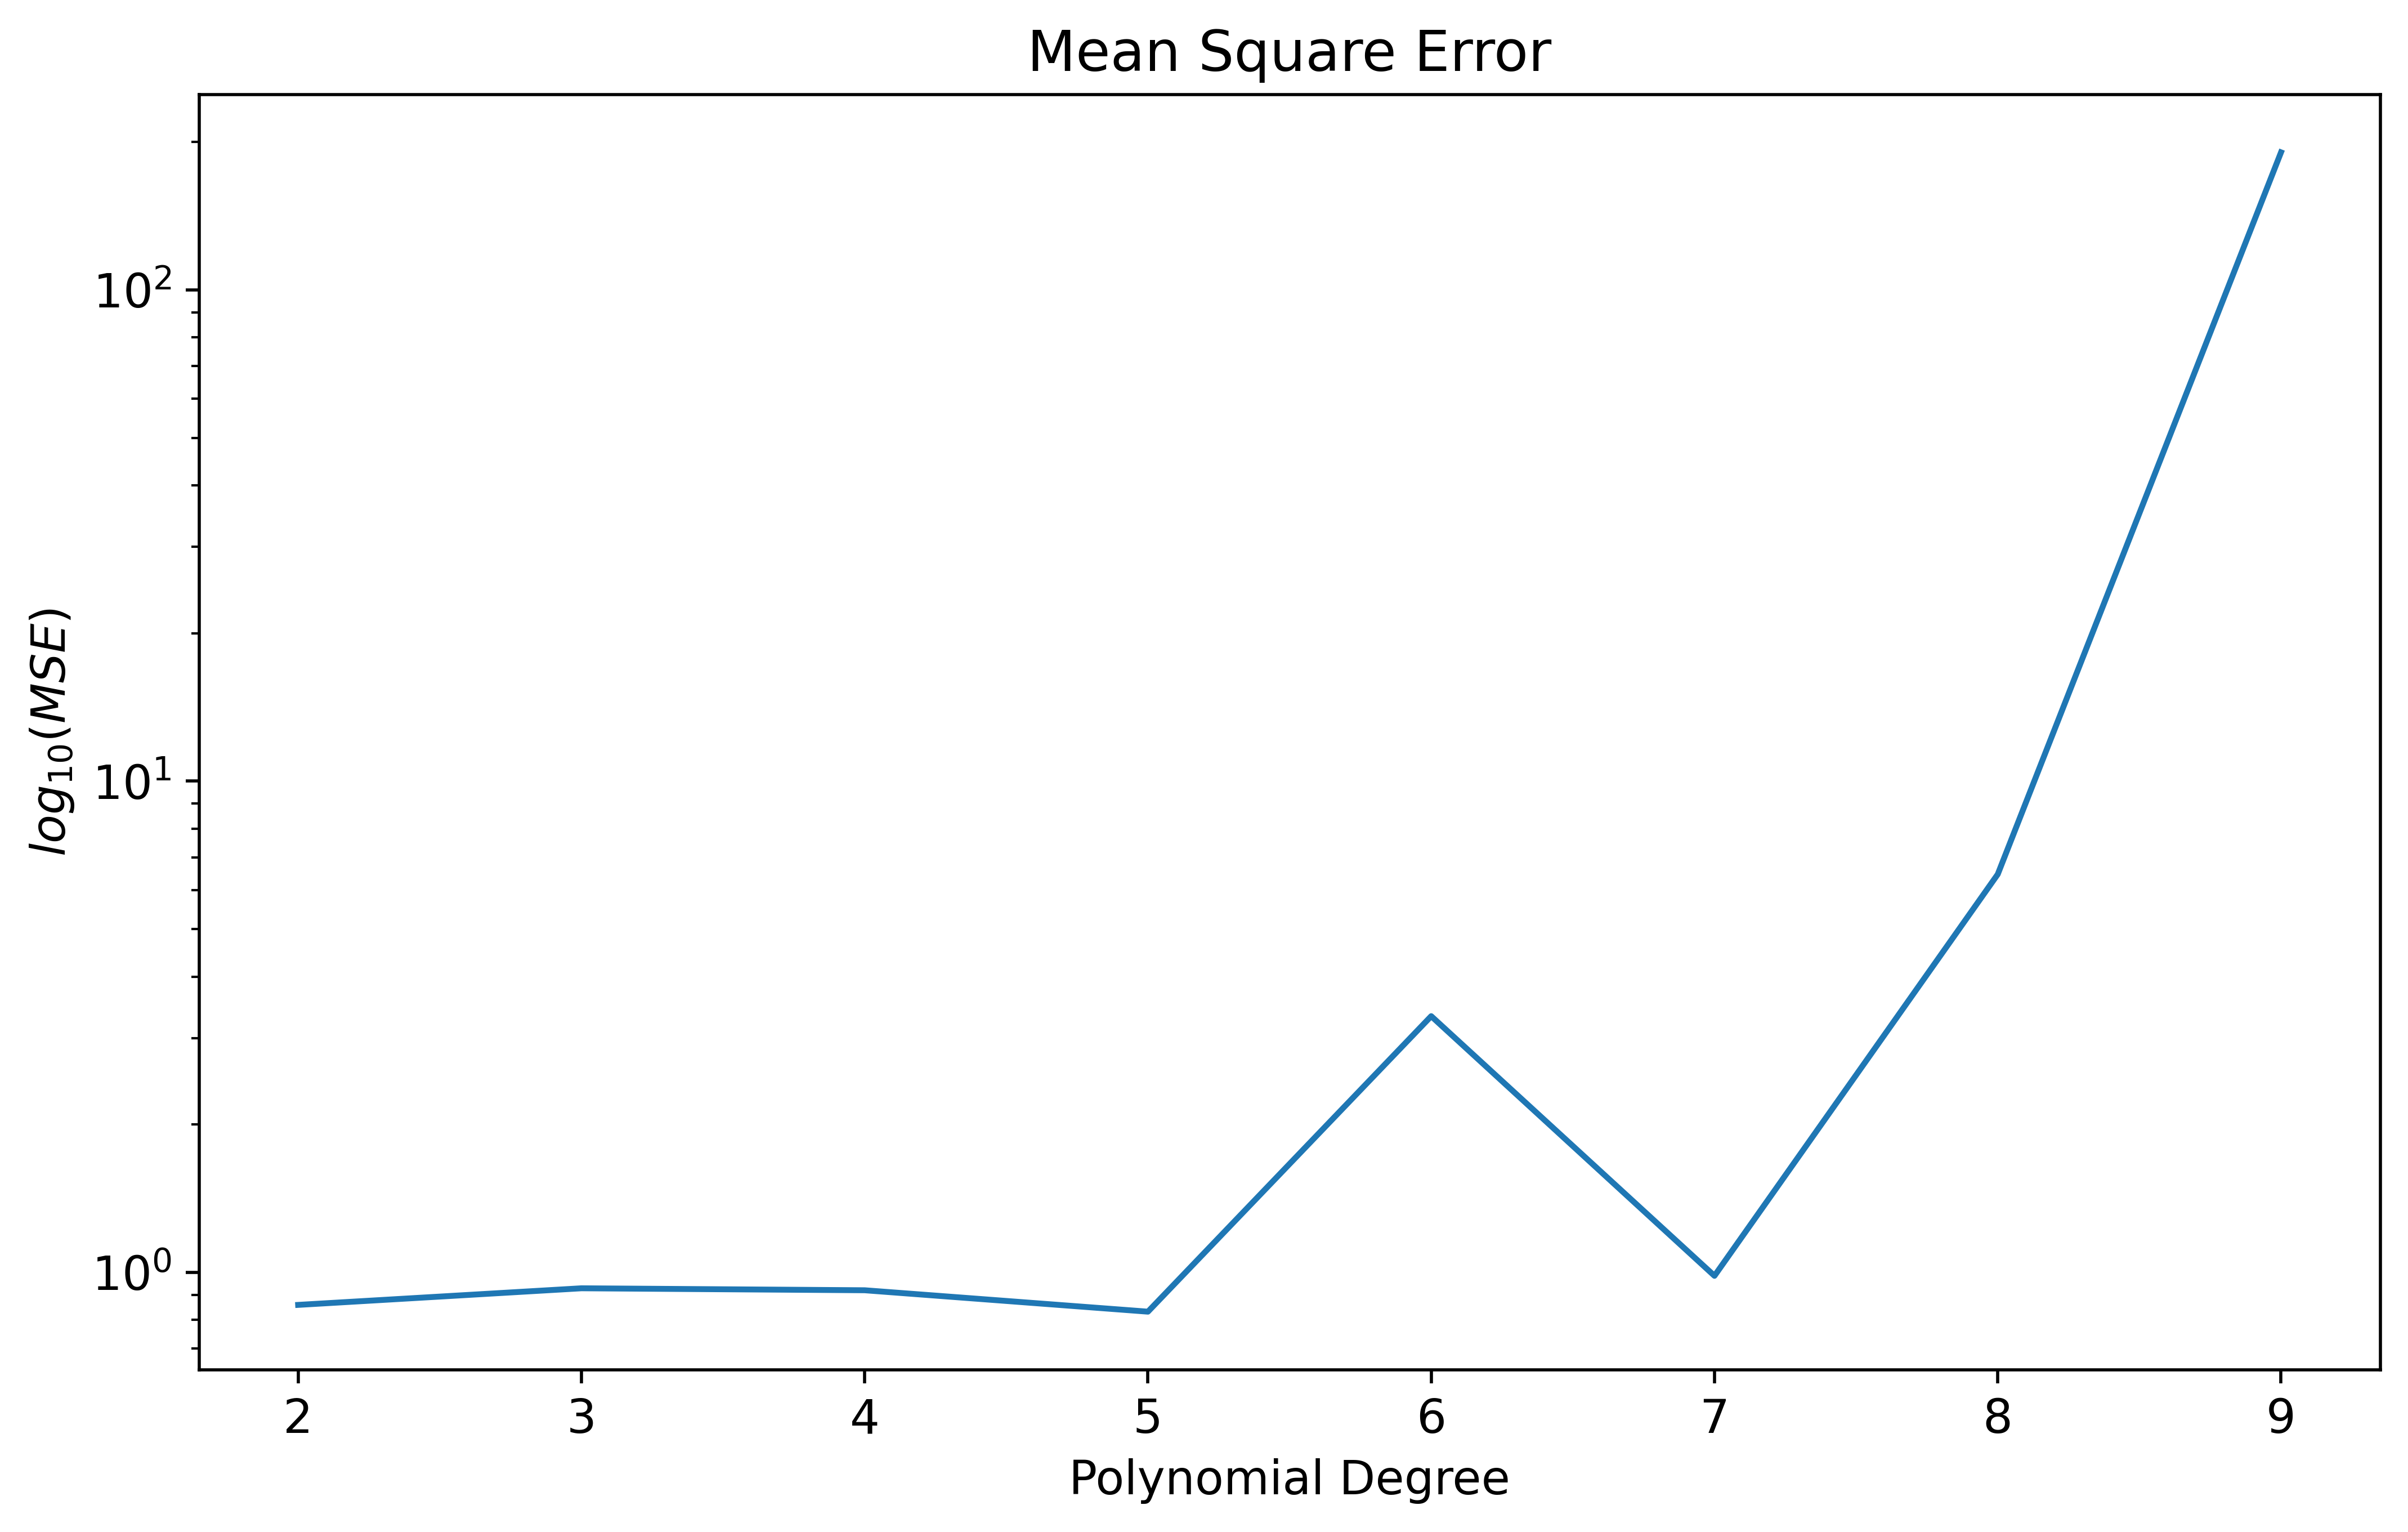

In [192]:
mask = (fit_MSE == np.min(fit_MSE))
deg_best = degrees[mask]
print('Best fit for degree: ', int(deg_best))

plt.plot(degrees, fit_MSE)
plt.ylabel(r'$log_{10}(MSE)$')
plt.xlabel('Polynomial Degree')
plt.semilogy()
plt.title('Mean Square Error');

### Basis functions and Kernel Regression

### Change in data points and Learning Curves